# Analysis of IMDB Dataset of Top 1000 Movies and TV Shows

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data into a pandas dataframe

In [2]:
df = pd.read_csv('data/imdb_top_1000.csv')

In [3]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## Data Cleaning

In [4]:
df.drop(["Poster_Link","Runtime","Released_Year","Certificate","Overview","IMDB_Rating","Meta_score","Star1","Star2","Star3","Star4","No_of_Votes","Gross"],axis=1,inplace=True)

In [5]:
df.head()

,Series_Title,Genre,Director
0,The Shawshank Redemption,Drama,Frank Darabont
1,The Godfather,"Crime, Drama",Francis Ford Coppola
2,The Dark Knight,"Action, Crime, Drama",Christopher Nolan
3,The Godfather: Part II,"Crime, Drama",Francis Ford Coppola
4,12 Angry Men,"Crime, Drama",Sidney Lumet


In [6]:
df.isnull().sum()

Series_Title    0
Genre           0
Director        0
dtype: int64

In [7]:
df.shape

(1000, 3)

## Data Analysis

### Explore the data to identify the most popular genre of movies and TV shows using pandas

In [8]:
df['Genre'].value_counts().head(1)

Drama    85
Name: Genre, dtype: int64

In [9]:
df1 = df['Genre'].value_counts().reset_index()

In [10]:
df1

,index,Genre
0,Drama,85
1,"Drama, Romance",37
2,"Comedy, Drama",35
3,"Comedy, Drama, Romance",31
4,"Action, Crime, Drama",30
...,...,...
197,"Adventure, Thriller",1
198,"Animation, Action, Sci-Fi",1
199,"Action, Crime, Comedy",1
200,"Animation, Crime, Mystery",1


### Visualize the most popular genre of movies and TV shows using matplotlib and seaborn

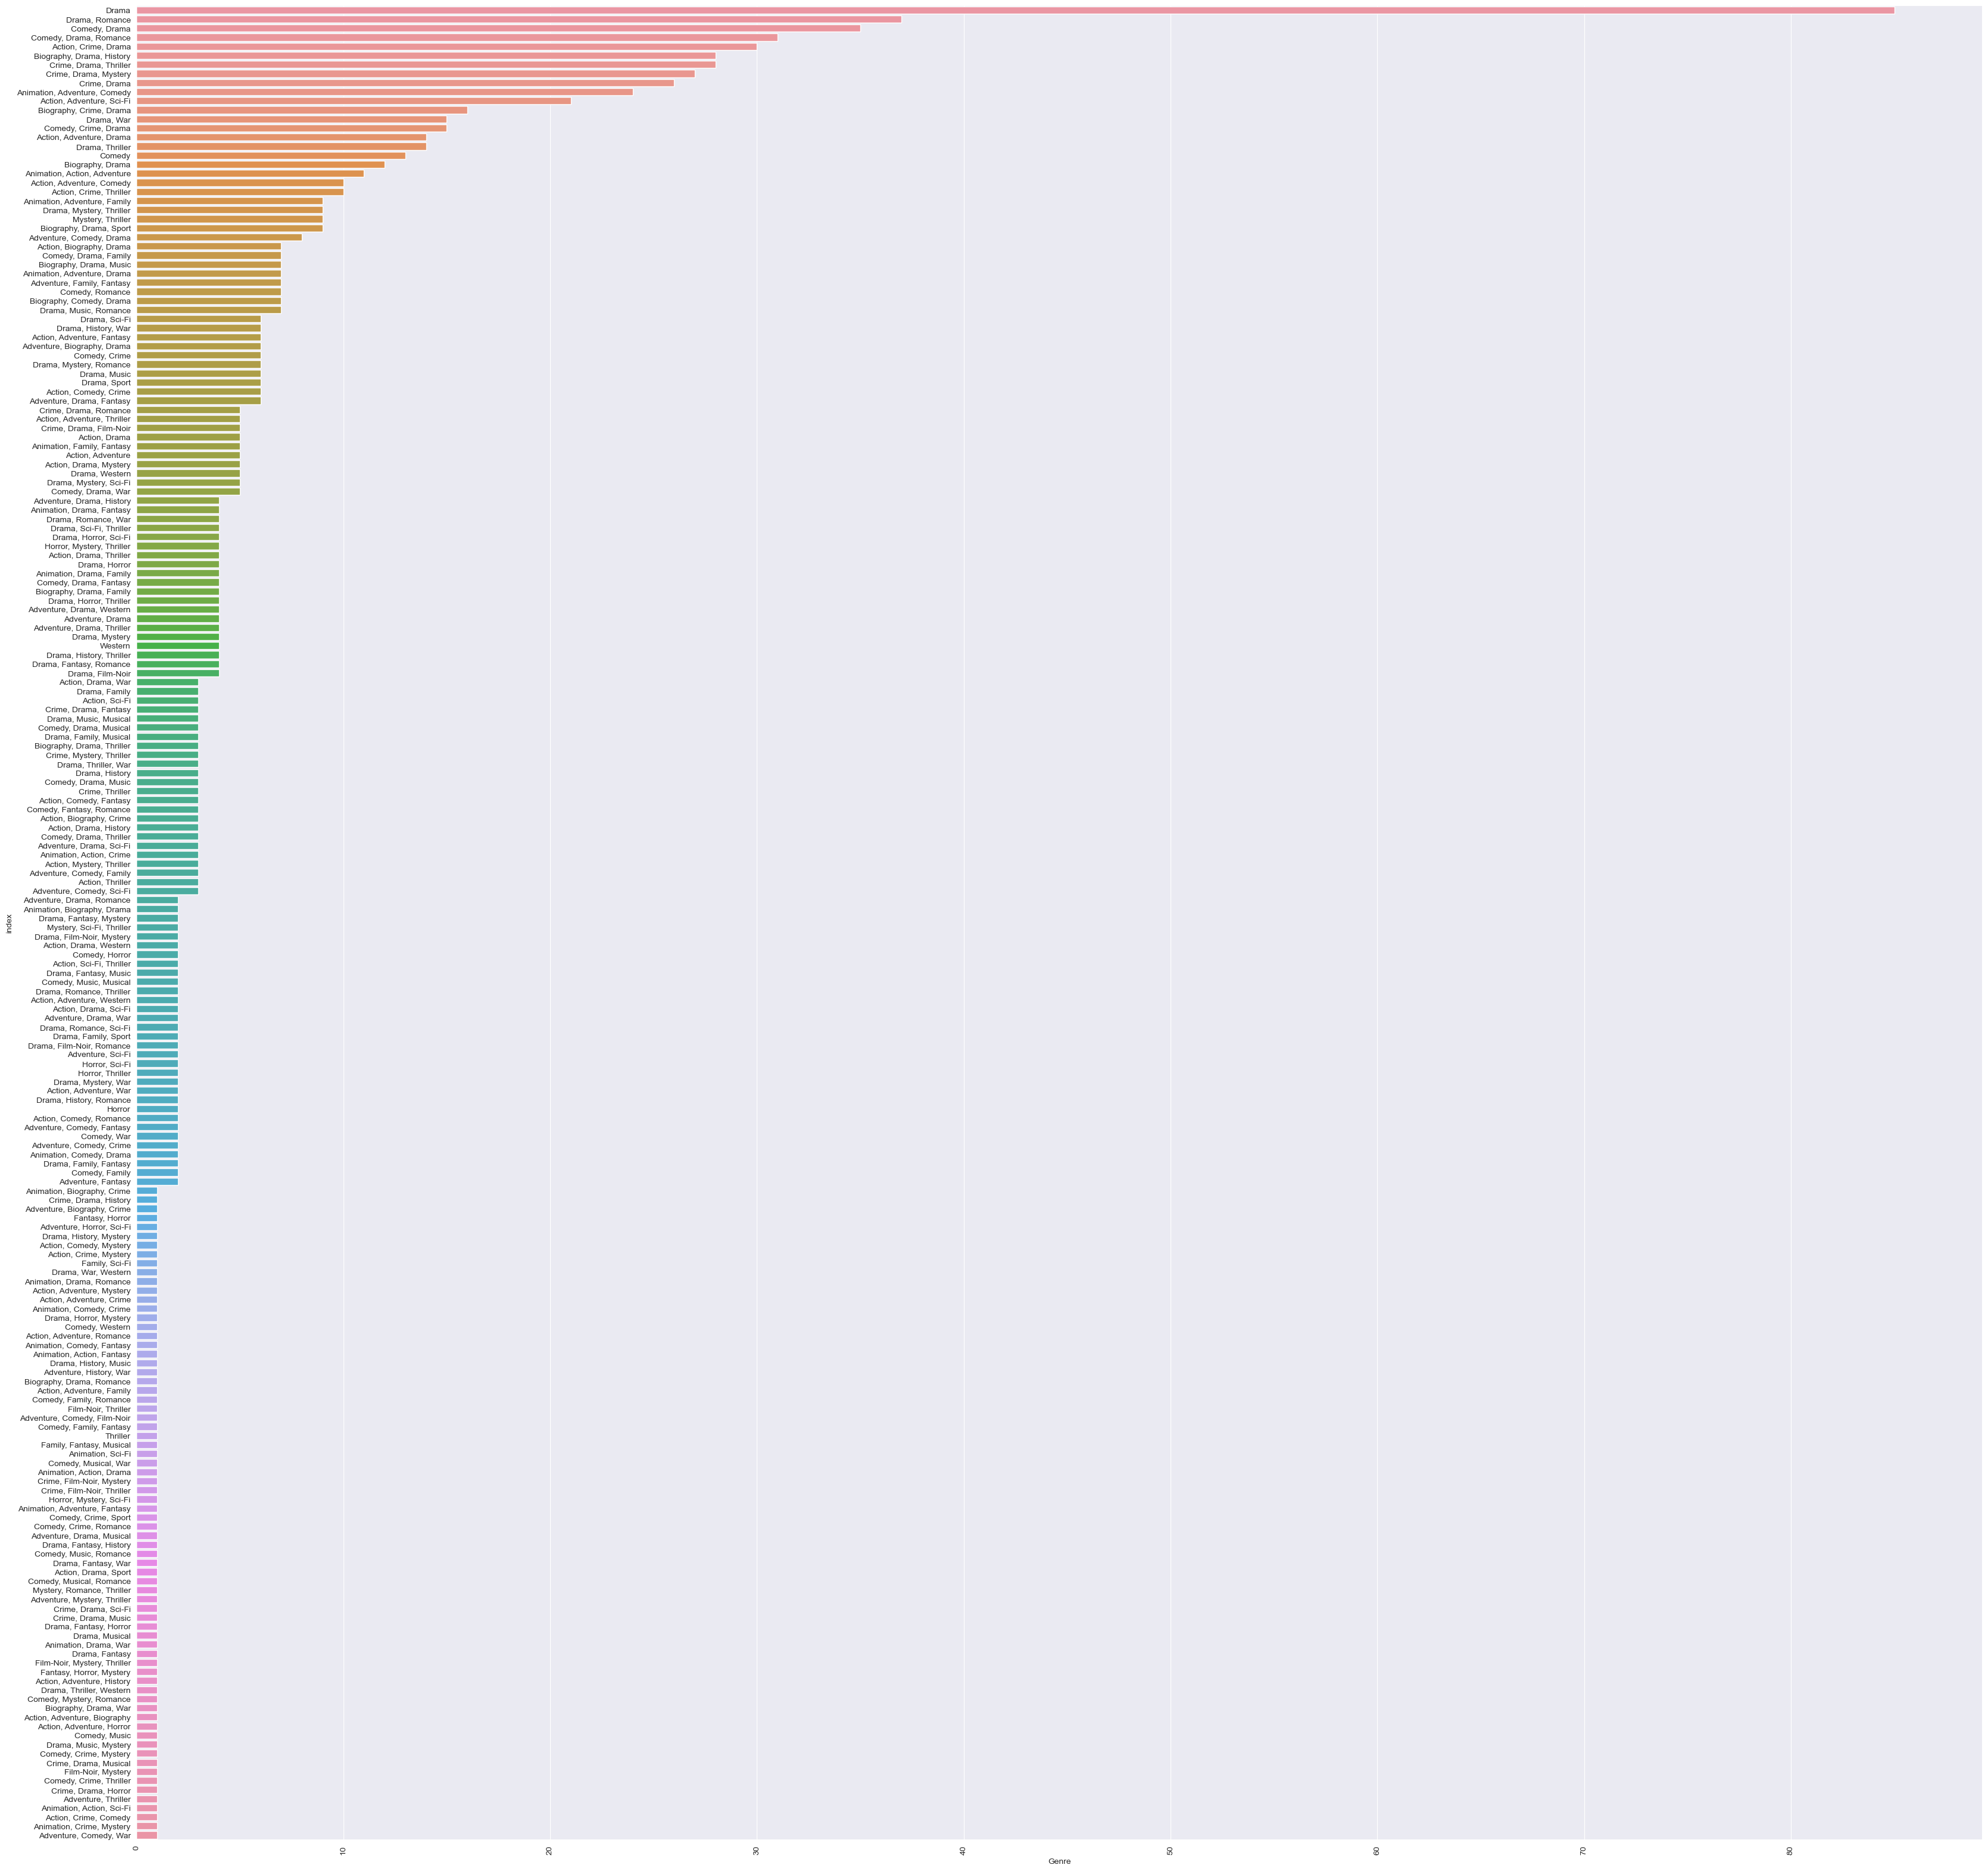

In [11]:
plt.figure(figsize=(40,40))
sns.barplot(x=df1['Genre'],y=df1['index'])
plt.xticks(rotation=90)
plt.show()

### Explore the data py splitting the Genre column to identify the most popular genre of movies and TV shows

In [12]:
df3 = df['Genre'].str.split(',',expand=True)

In [13]:
df3

,0,1,2
0,Drama,None,None
1,Crime,Drama,None
2,Action,Crime,Drama
3,Crime,Drama,None
4,Crime,Drama,None
...,...,...,...
995,Comedy,Drama,Romance
996,Drama,Western,None
997,Drama,Romance,War
998,Drama,War,None


In [14]:
df4 = pd.concat([df,df3],axis=1)

In [15]:
df4

,Series_Title,Genre,Director,0,1,2
0,The Shawshank Redemption,Drama,Frank Darabont,Drama,None,None
1,The Godfather,"Crime, Drama",Francis Ford Coppola,Crime,Drama,None
2,The Dark Knight,"Action, Crime, Drama",Christopher Nolan,Action,Crime,Drama
3,The Godfather: Part II,"Crime, Drama",Francis Ford Coppola,Crime,Drama,None
4,12 Angry Men,"Crime, Drama",Sidney Lumet,Crime,Drama,None
...,...,...,...,...,...,...
995,Breakfast at Tiffany's,"Comedy, Drama, Romance",Blake Edwards,Comedy,Drama,Romance
996,Giant,"Drama, Western",George Stevens,Drama,Western,None
997,From Here to Eternity,"Drama, Romance, War",Fred Zinnemann,Drama,Romance,War
998,Lifeboat,"Drama, War",Alfred Hitchcock,Drama,War,None


In [16]:
df4.fillna("no",inplace=True)

In [17]:
df4

,Series_Title,Genre,Director,0,1,2
0,The Shawshank Redemption,Drama,Frank Darabont,Drama,no,no
1,The Godfather,"Crime, Drama",Francis Ford Coppola,Crime,Drama,no
2,The Dark Knight,"Action, Crime, Drama",Christopher Nolan,Action,Crime,Drama
3,The Godfather: Part II,"Crime, Drama",Francis Ford Coppola,Crime,Drama,no
4,12 Angry Men,"Crime, Drama",Sidney Lumet,Crime,Drama,no
...,...,...,...,...,...,...
995,Breakfast at Tiffany's,"Comedy, Drama, Romance",Blake Edwards,Comedy,Drama,Romance
996,Giant,"Drama, Western",George Stevens,Drama,Western,no
997,From Here to Eternity,"Drama, Romance, War",Fred Zinnemann,Drama,Romance,War
998,Lifeboat,"Drama, War",Alfred Hitchcock,Drama,War,no


In [18]:
df4.rename(columns={0:'Genre1',1:'Genre2',2:'Genre3'},inplace=True)

In [19]:
df4

,Series_Title,Genre,Director,Genre1,Genre2,Genre3
0,The Shawshank Redemption,Drama,Frank Darabont,Drama,no,no
1,The Godfather,"Crime, Drama",Francis Ford Coppola,Crime,Drama,no
2,The Dark Knight,"Action, Crime, Drama",Christopher Nolan,Action,Crime,Drama
3,The Godfather: Part II,"Crime, Drama",Francis Ford Coppola,Crime,Drama,no
4,12 Angry Men,"Crime, Drama",Sidney Lumet,Crime,Drama,no
...,...,...,...,...,...,...
995,Breakfast at Tiffany's,"Comedy, Drama, Romance",Blake Edwards,Comedy,Drama,Romance
996,Giant,"Drama, Western",George Stevens,Drama,Western,no
997,From Here to Eternity,"Drama, Romance, War",Fred Zinnemann,Drama,Romance,War
998,Lifeboat,"Drama, War",Alfred Hitchcock,Drama,War,no


In [20]:
df4['Genre1'].unique()

array(['Drama', 'Crime', 'Action', 'Biography', 'Western', 'Comedy',
       'Adventure', 'Animation', 'Horror', 'Mystery', 'Film-Noir',
       'Fantasy', 'Family', 'Thriller'], dtype=object)

In [21]:
df4['Drama'] = df4['Genre1'].apply(lambda x: 1 if 'Drama' in x else 0)
df4['Crime'] = df4['Genre1'].apply(lambda x: 1 if 'Crime' in x else 0)
df4['Action'] = df4['Genre1'].apply(lambda x: 1 if 'Action' in x else 0)
df4['Biography'] = df4['Genre1'].apply(lambda x: 1 if 'Biography' in x else 0)
df4['Western'] = df4['Genre1'].apply(lambda x: 1 if 'Western' in x else 0)
df4['Comedy'] = df4['Genre1'].apply(lambda x: 1 if 'Comedy' in x else 0)
df4['Adventure'] = df4['Genre1'].apply(lambda x: 1 if 'Adventure' in x else 0)
df4['Animation'] = df4['Genre1'].apply(lambda x: 1 if 'Animation' in x else 0)
df4['Horror'] = df4['Genre1'].apply(lambda x: 1 if 'Horror' in x else 0)
df4['Mystery'] = df4['Genre1'].apply(lambda x: 1 if 'Mystery' in x else 0)
df4['Film-Noir'] = df4['Genre1'].apply(lambda x: 1 if 'Film-Noir' in x else 0)
df4['Fantasy'] = df4['Genre1'].apply(lambda x: 1 if 'Fantasy' in x else 0)
df4['Family'] = df4['Genre1'].apply(lambda x: 1 if 'Family' in x else 0)
df4['Thriller'] = df4['Genre1'].apply(lambda x: 1 if 'Thriller' in x else 0)

In [22]:
df4

,Series_Title,Genre,Director,Genre1,Genre2,Genre3,Drama,Crime,Action,Biography,Western,Comedy,Adventure,Animation,Horror,Mystery,Film-Noir,Fantasy,Family,Thriller
0,The Shawshank Redemption,Drama,Frank Darabont,Drama,no,no,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,The Godfather,"Crime, Drama",Francis Ford Coppola,Crime,Drama,no,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,The Dark Knight,"Action, Crime, Drama",Christopher Nolan,Action,Crime,Drama,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,The Godfather: Part II,"Crime, Drama",Francis Ford Coppola,Crime,Drama,no,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,12 Angry Men,"Crime, Drama",Sidney Lumet,Crime,Drama,no,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,"Comedy, Drama, Romance",Blake Edwards,Comedy,Drama,Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0
996,Giant,"Drama, Western",George Stevens,Drama,Western,no,1,0,0,0,0,0,0,0,0,0,0,0,0,0
997,From Here to Eternity,"Drama, Romance, War",Fred Zinnemann,Drama,Romance,War,1,0,0,0,0,0,0,0,0,0,0,0,0,0
998,Lifeboat,"Drama, War",Alfred Hitchcock,Drama,War,no,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
df4['Drama1'] = df4['Genre2'].apply(lambda x: 1 if 'Drama' in x else 0)
df4['Crime1'] = df4['Genre2'].apply(lambda x: 1 if 'Crime' in x else 0)
df4['Action1'] = df4['Genre2'].apply(lambda x: 1 if 'Action' in x else 0)
df4['Biography1'] = df4['Genre2'].apply(lambda x: 1 if 'Biography' in x else 0)
df4['Western1'] = df4['Genre2'].apply(lambda x: 1 if 'Western' in x else 0)
df4['Comedy1'] = df4['Genre2'].apply(lambda x: 1 if 'Comedy' in x else 0)
df4['Adventure1'] = df4['Genre2'].apply(lambda x: 1 if 'Adventure' in x else 0)
df4['Animation1'] = df4['Genre2'].apply(lambda x: 1 if 'Animation' in x else 0)
df4['Horror1'] = df4['Genre2'].apply(lambda x: 1 if 'Horror' in x else 0)
df4['Mystery1'] = df4['Genre2'].apply(lambda x: 1 if 'Mystery' in x else 0)
df4['Film-Noir1'] = df4['Genre2'].apply(lambda x: 1 if 'Film-Noir' in x else 0)
df4['Fantasy1'] = df4['Genre2'].apply(lambda x: 1 if 'Fantasy' in x else 0)
df4['Family1'] = df4['Genre2'].apply(lambda x: 1 if 'Family' in x else 0)
df4['Thriller1'] = df4['Genre2'].apply(lambda x: 1 if 'Thriller' in x else 0)

In [24]:
df4['Drama2'] = df4['Genre3'].apply(lambda x: 1 if 'Drama' in x else 0)
df4['Crime2'] = df4['Genre3'].apply(lambda x: 1 if 'Crime' in x else 0)
df4['Action2'] = df4['Genre3'].apply(lambda x: 1 if 'Action' in x else 0)
df4['Biography2'] = df4['Genre3'].apply(lambda x: 1 if 'Biography' in x else 0)
df4['Western2'] = df4['Genre3'].apply(lambda x: 1 if 'Western' in x else 0)
df4['Comedy2'] = df4['Genre3'].apply(lambda x: 1 if 'Comedy' in x else 0)
df4['Adventure2'] = df4['Genre3'].apply(lambda x: 1 if 'Adventure' in x else 0)
df4['Animation2'] = df4['Genre3'].apply(lambda x: 1 if 'Animation' in x else 0)
df4['Horror2'] = df4['Genre3'].apply(lambda x: 1 if 'Horror' in x else 0)
df4['Mystery2'] = df4['Genre3'].apply(lambda x: 1 if 'Mystery' in x else 0)
df4['Film-Noir2'] = df4['Genre3'].apply(lambda x: 1 if 'Film-Noir' in x else 0)
df4['Fantasy2'] = df4['Genre3'].apply(lambda x: 1 if 'Fantasy' in x else 0)
df4['Family2'] = df4['Genre3'].apply(lambda x: 1 if 'Family' in x else 0)
df4['Thriller2'] = df4['Genre3'].apply(lambda x: 1 if 'Thriller' in x else 0)

In [25]:
df4['Drama'] = df4['Drama'] + df4['Drama1'] + df4['Drama2']
df4['Crime'] = df4['Crime'] + df4['Crime1'] + df4['Crime2']
df4['Action'] = df4['Action'] + df4['Action1'] + df4['Action2']
df4['Biography'] = df4['Biography'] + df4['Biography1'] + df4['Biography2']
df4['Western'] = df4['Western'] + df4['Western1'] + df4['Western2']
df4['Comedy'] = df4['Comedy'] + df4['Comedy1'] + df4['Comedy2']
df4['Adventure'] = df4['Adventure'] + df4['Adventure1'] + df4['Adventure2']
df4['Animation'] = df4['Animation'] + df4['Animation1'] + df4['Animation2']
df4['Horror'] = df4['Horror'] + df4['Horror1'] + df4['Horror2']
df4['Mystery'] = df4['Mystery'] + df4['Mystery1'] + df4['Mystery2']
df4['Film-Noir'] = df4['Film-Noir'] + df4['Film-Noir1'] + df4['Film-Noir2']
df4['Fantasy'] = df4['Fantasy'] + df4['Fantasy1'] + df4['Fantasy2']
df4['Family'] = df4['Family'] + df4['Family1'] + df4['Family2']
df4['Thriller'] = df4['Thriller'] + df4['Thriller1'] + df4['Thriller2']

In [26]:
df4.drop(['Genre','Genre1', 'Genre2', 'Genre3', 'Drama1', 'Drama2', 'Crime1', 'Crime2', 'Action1', 'Action2', 'Biography1', 'Biography2', 'Western1', 'Western2', 'Comedy1', 'Comedy2', 'Adventure1', 'Adventure2', 'Animation1', 'Animation2', 'Horror1', 'Horror2', 'Mystery1', 'Mystery2', 'Film-Noir1', 'Film-Noir2', 'Fantasy1', 'Fantasy2', 'Family1', 'Family2', 'Thriller1', 'Thriller2'], axis=1, inplace=True)

In [27]:
df4

,Series_Title,Director,Drama,Crime,Action,Biography,Western,Comedy,Adventure,Animation,Horror,Mystery,Film-Noir,Fantasy,Family,Thriller
0,The Shawshank Redemption,Frank Darabont,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,The Godfather,Francis Ford Coppola,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,The Dark Knight,Christopher Nolan,1,1,1,0,0,0,0,0,0,0,0,0,0,0
3,The Godfather: Part II,Francis Ford Coppola,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,12 Angry Men,Sidney Lumet,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,Blake Edwards,1,0,0,0,0,1,0,0,0,0,0,0,0,0
996,Giant,George Stevens,1,0,0,0,1,0,0,0,0,0,0,0,0,0
997,From Here to Eternity,Fred Zinnemann,1,0,0,0,0,0,0,0,0,0,0,0,0,0
998,Lifeboat,Alfred Hitchcock,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
df5 = pd.DataFrame(df4.sum(axis=0), columns=['Count'])

In [29]:
df5

,Count
Series_Title,The Shawshank RedemptionThe GodfatherThe Dark ...
Director,Frank DarabontFrancis Ford CoppolaChristopher ...
Drama,724
Crime,209
Action,189
Biography,109
Western,20
Comedy,233
Adventure,196
Animation,82


In [30]:
df5 = df5.drop(["Series_Title", "Director"])


In [31]:
df5

,Count
Drama,724
Crime,209
Action,189
Biography,109
Western,20
Comedy,233
Adventure,196
Animation,82
Horror,32
Mystery,99


### Visualize the data using a bar chart to show the most popular genre

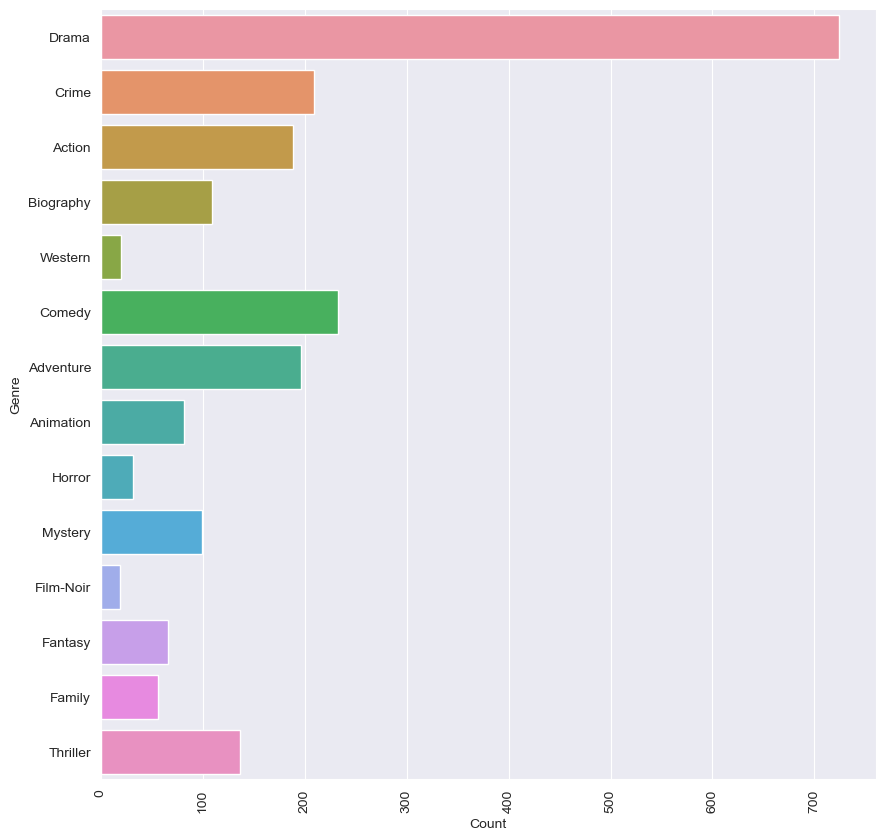

In [32]:
df5.index.names = ['Genre']
plt.figure(figsize=(10, 10))
sns.barplot(x=df5['Count'], y=df5.index)
plt.xticks(rotation=90)
plt.show()

### Identify the director with the most top-rated movies/TV shows


In [33]:
df2 = df['Director'].value_counts().reset_index()

In [34]:
df2

,index,Director
0,Alfred Hitchcock,14
1,Steven Spielberg,13
2,Hayao Miyazaki,11
3,Martin Scorsese,10
4,Akira Kurosawa,10
...,...,...
543,Neill Blomkamp,1
544,Tomas Alfredson,1
545,Duncan Jones,1
546,Jacques Audiard,1


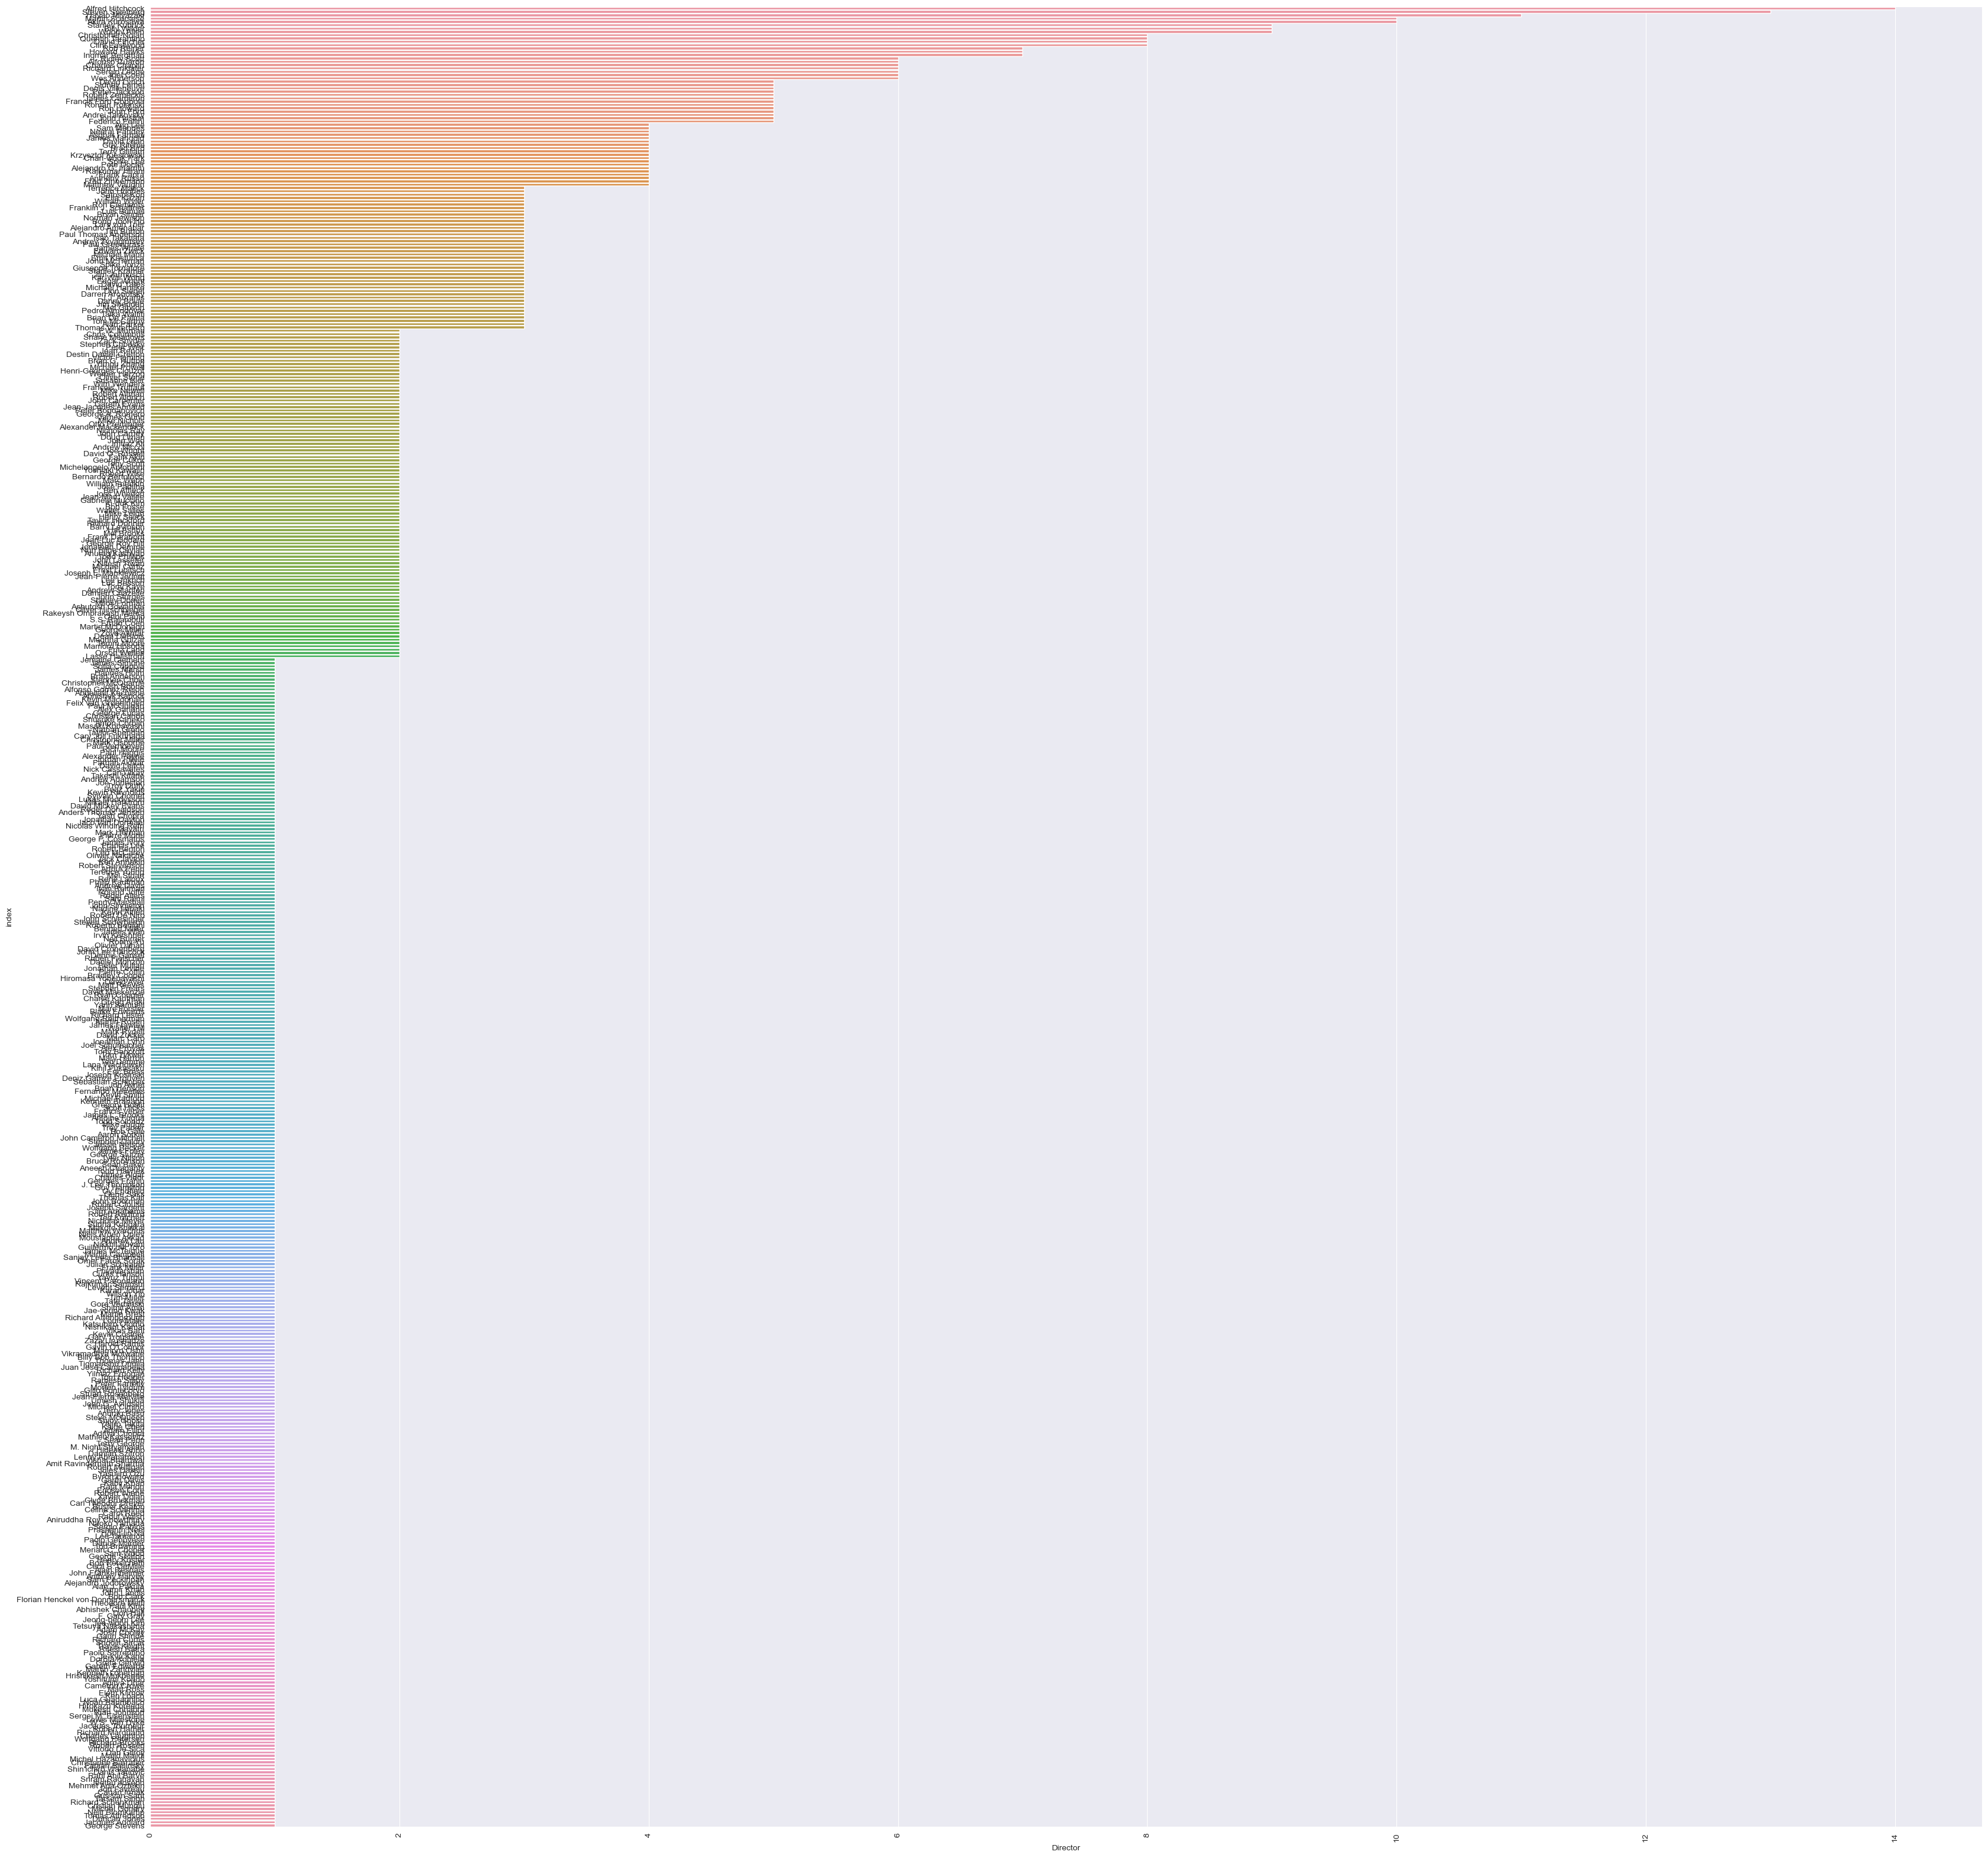

In [35]:
plt.figure(figsize=(40,40))
sns.barplot(x=df2['Director'],y=df2['index'])
plt.xticks(rotation=90)
plt.show()

## Introduction:
The objective of this analysis is to explore the IMDB dataset of the top 1000 movies and TV shows, and determine the most popular genre and the director with the most top-rated movies/TV shows. The dataset was downloaded from Kaggle and loaded into a pandas dataframe for further analysis.

## Data Cleaning:
Before analyzing the data, some initial data cleaning and preprocessing steps were performed. This involved removing unnecessary columns that are not relevant to our analysis

## Exploring Popular Genres:
To identify the most popular genre of movies and TV shows, the dataset was examined using pandas. The 'Genre' column in the dataframe provided information about the genre of each movie or TV show. By analyzing this column, we could determine which genre appears most frequently in the dataset, indicating its popularity.

## Genre Distribution:
To visualize the distribution of genres in the dataset, a new dataframe was created containing the count of movies/TV shows in each genre. This was achieved by grouping the data by genre and counting the occurrences of each genre. The resulting dataframe provided the necessary information to create a bar chart using the matplotlib library, which showcased the most popular genre of movies and TV shows.

## Director with the Most Top-Rated Movies/TV Shows:
Another aspect of the analysis involved identifying the director with the most top-rated movies/TV shows. To achieve this, a new dataframe was created, which contained the count of movies/TV shows directed by each director. By grouping the data by director and counting the occurrences, we could determine which director had the highest number of top-rated productions.



## Director Distribution:
Similar to the genre distribution, the director distribution was visualized using a bar chart. The chart provided a visual representation of the director with the most top-rated movies/TV shows.

## Summary of Findings:
Based on the analysis of the IMDB dataset of top 1000 movies and TV shows, the following insights and observations were made:

1. The most popular genre of movies and TV shows in the dataset is Drama. This genre appears most frequently, indicating its popularity among the top-rated productions.

2. The director with the most top-rated movies/TV shows is Alfred Hitchcock. This director has directed the highest number of productions in the top 1000 list.


## Conclusion:
In conclusion, the analysis of the IMDB dataset of top 1000 movies and TV shows using pandas has provided insights into the most popular genre and the director with the most top-rated productions. By leveraging the power of data analysis, we can uncover valuable information that can drive decision-making in the entertainment industry. Further analysis and exploration of the dataset can lead to additional insights and opportunities for improvement in the film and television industry.